# Credit Risk Evaluator

In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Retrieve the Data

In [2]:
# Import the data
lending_data = pd.read_csv('Resources/lending_data.csv')
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
X = lending_data.drop(labels='loan_status', axis=1)
y = lending_data['loan_status']

## Predict Model Performance

*Initial Prediction:
Since the number of noise variables are less, I expect logistic regression to perform better than random forests classifier*

## Split the Data into Training and Testing Sets

In [13]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

In [14]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [15]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
#Scoring based on logistic regression of unscaled data
print(f"Training Data Score for Logistic Regression: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score for Logistic Regression: {classifier.score(X_test, y_test)}")

Training Data Score for Logistic Regression: 0.9920381070298528
Testing Data Score for Logistic Regression: 0.9921068922822947


In [8]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [9]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [10]:
#Scoring based on logistic regression of scaled data
test_model(LogisticRegression(), data)

Model: LogisticRegression
Train score: 0.9942908240473243
Test Score: 0.9936545604622369



In [19]:
# Print the classification report for the Logistic Regression model

y_pred = classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     18741
           1       0.08      1.00      0.15       643

    accuracy                           0.64     19384
   macro avg       0.54      0.81      0.46     19384
weighted avg       0.97      0.64      0.75     19384



C:\Users\bhara\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Train a Random Forest Classifier model and print the model score

In [21]:
# Scoring based on Random Forest Classifier of scaled data without choosing important features
clf_random = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_random.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_random.score(X_test_scaled, y_test)}')

Training Score: 0.9973345714678773
Testing Score: 0.9916941807676434


In [25]:
# Choosing important features
feature_importances = clf_random.feature_importances_

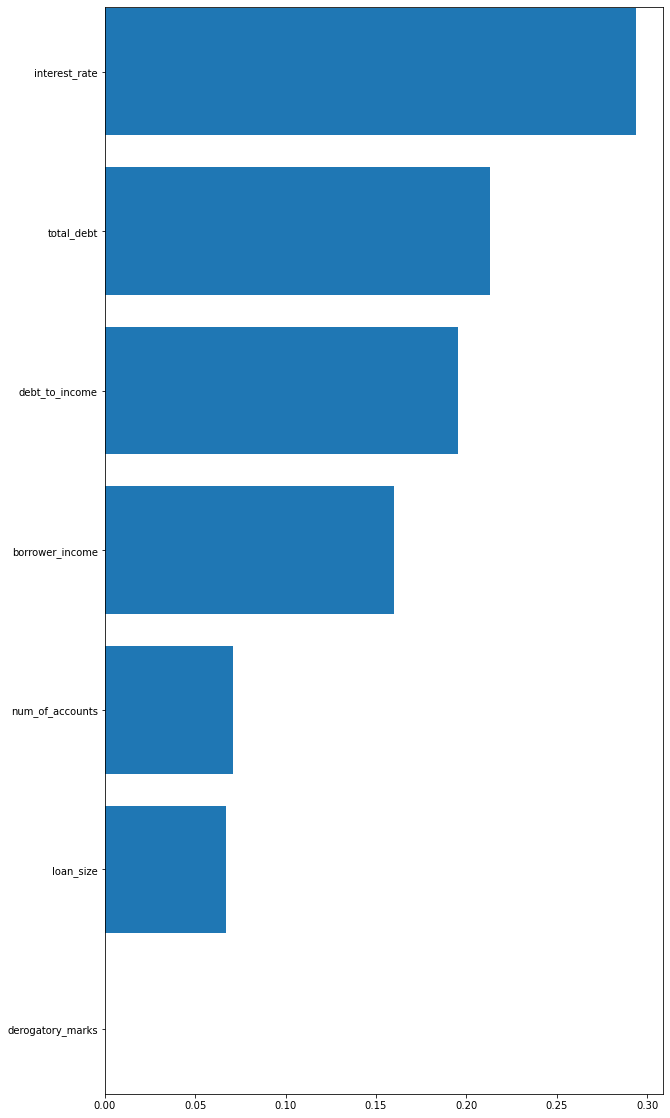

In [26]:
features = sorted(zip(X.columns, clf_random.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [27]:
feature_names = list(X.columns.values)

fn = np.array(feature_names)

In [28]:
#Important features determination
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf_random)
sfm = sel.fit(X_train_scaled, y_train)
fn[sfm.get_support()]

array(['interest_rate', 'borrower_income', 'debt_to_income', 'total_debt'],
      dtype='<U16')

In [29]:
#Fitting the data for selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\bhara\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [34]:
data_rf_sel = [X_selected_train_scaled, X_selected_test_scaled, y_train, y_test]

In [35]:
def test_model_rf_sel(model, data_rf_sel):
    X_selected_train_scaled, X_selected_test_scaled, y_train, y_test = data
    reg = model.fit(X_selected_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_selected_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_selected_test_scaled, y_test)}\n')
    plt.show() 

In [36]:
#Predicting the score for selected features
test_model_rf_sel(RandomForestClassifier(), data_rf_sel)

Model: RandomForestClassifier
Train score: 0.9975409272252029
Test Score: 0.991642591828312



In [39]:
# Print the classification report for the Random forest classifier

y_pred_random = clf_random.predict(X_test_scaled)

print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18765
           1       0.04      0.05      0.04       619

    accuracy                           0.94     19384
   macro avg       0.50      0.51      0.51     19384
weighted avg       0.94      0.94      0.94     19384



*The scores in both logistic regression and random forest classifier were similar. 
I have checked the scores with random forest classifier by using important features as well. Even in this case, the training and testing scores were similar.
However, the accuracy of the model with random forest classifier was better than the model with linear regression.
This is contrary to my initial assumption.*